# 2- Mesure de distance

Certaines variables très corrélées donc distance euclidienne donne résultats misleading. 
Toutefois, minimisation de cet effet en centrant et surtout en réduisant les variables pour variance entre 1 et 0. On peut le constater dans les plots, pas de corrélation entre les composantes principales car chacune des composantes est orthogonales. Distance Mahalanobis revient à distance euclidienne avec matrice de covariance presque nulle. Centrer et réduirer les données au départ rend cette distance un peu caduque.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from models import available_distances, KNN, NearestCentroid

df = pd.read_csv("./QSAR_10best_dataset.csv")
X, y = df.loc[:, df.columns != "Class"].to_numpy(), df.loc[:, "Class"].to_numpy()
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [17]:
def mahalanobis(X: np.array, mu: np.array, S: np.array):
    S_inv = np.linalg.inv(S) + 1e-12
    return (X - mu).T @ S_inv @ (X - mu)

def nearest_centroid_classifier(data: np.array, targets, label_enc, dist_measure="euclidean"):
    clf = NearestCentroid(label_encoder=label_enc, metric=dist_measure)
    clf.fit(data, targets)
    y_pred = clf.predict(data)
    return clf.evaluate(targets, y_pred)

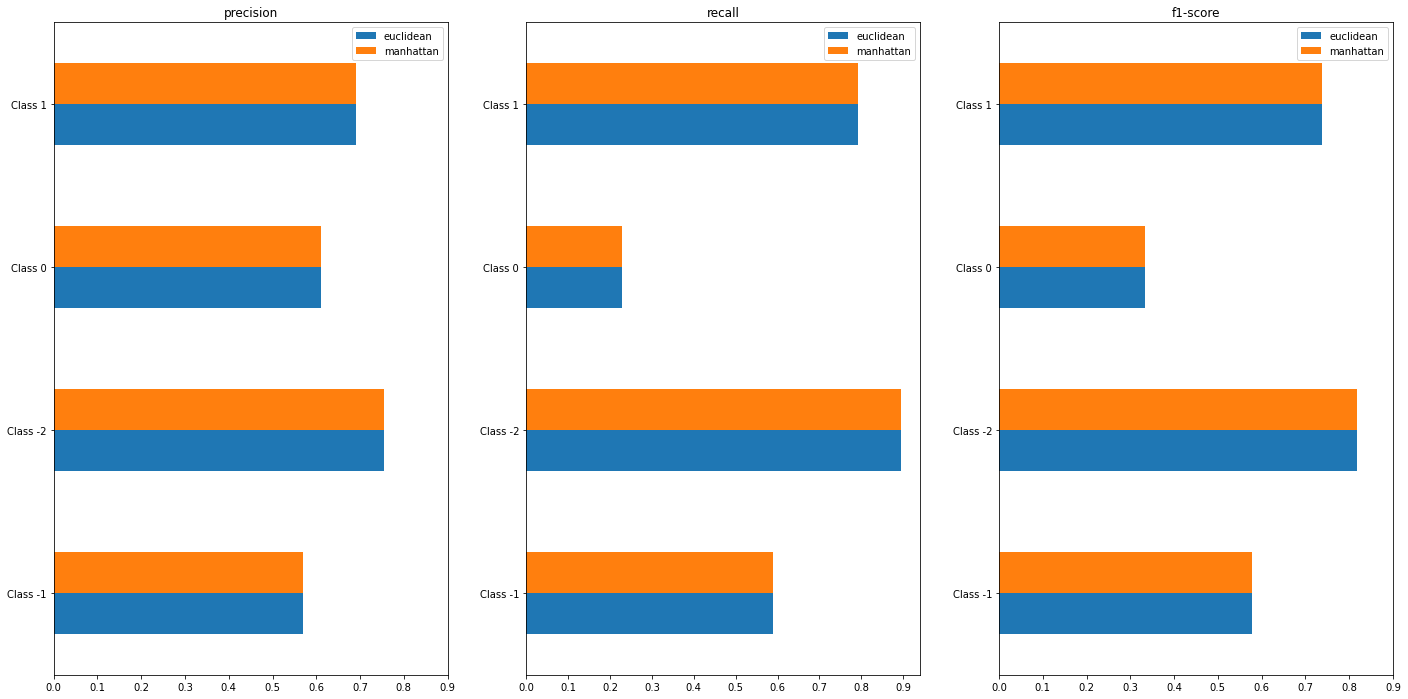

In [18]:
from collections import defaultdict

d = defaultdict()
for dist_measure in available_distances:
    d[dist_measure] = nearest_centroid_classifier(X, y, le, dist_measure)

f, axs = plt.subplots(1, 3, figsize=(24, 12))

dfs = defaultdict()
for eval_metric in ["precision", "recall", "f1-score"]:
    dfs[eval_metric] = pd.concat(
        [dframe.loc[eval_metric][0:4].rename(name) for name, dframe in d.items()], axis=1
    )
for ax, df_tuple in zip(axs, dfs.items()):
    name, dframe = df_tuple
    dframe.plot(kind="barh", ax=ax)
    ax.set_title(name)
    ax.set_xticks(np.arange(0, 1, step=0.1))

plt.show()

In [36]:
clf = NearestCentroid(label_encoder=le, metric=dist_measure)
clf.fit(X, y)

a = np.sqrt(((np.expand_dims(X, 1) - clf.centroids)**2).sum(axis=2))
b = np.abs((np.expand_dims(X, 1) - clf.centroids)).sum(axis=2)
np.allclose(a, b)
#np.sqrt((np.expand_dims(X, 1) - clf.centroids)**2)


False

In [41]:
np.allclose(np.linalg.norm((np.expand_dims(X, 1) - clf.centroids), axis=2),a)

False

In [38]:
a

array([[ 8.88992793,  8.42034485,  9.23168175, 10.47425142,  6.39418553],
       [ 4.59233044,  5.73112563,  4.12908694,  2.58142425,  6.39418553],
       [ 2.36291427,  0.98532368,  3.20458119,  4.9246568 ,  3.64008732],
       ...,
       [ 4.63725863,  5.853216  ,  3.9024416 ,  2.09477889,  6.15265244],
       [ 4.32325631,  5.17102284,  4.16878064,  2.78593422,  4.61753463],
       [ 5.56277663,  6.77046942,  5.00279415,  2.96706362,  6.83060867]])